In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.autograd import Variable
import torch.optim as optim

### function to learn:

In [2]:
def function(x):
    return torch.exp(-x/5)*torch.sin(x)

plot of the function to learn:

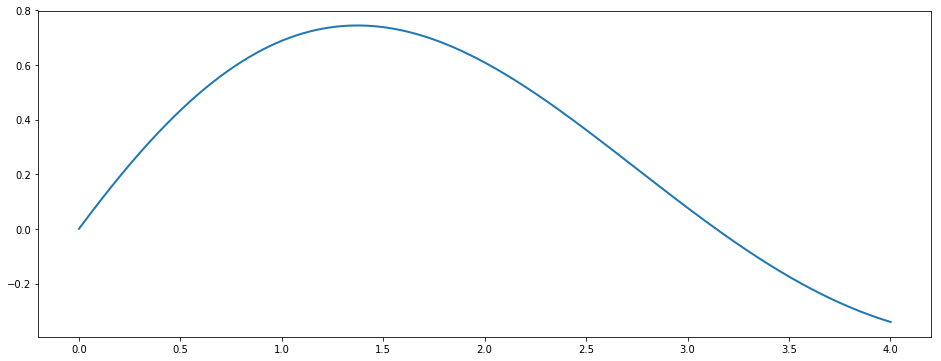

In [3]:
x_show = torch.arange(0.001, 4.001, 0.001)
y_show = function(x_show)
plt.figure(figsize=(16, 6))
plt.plot(x_show.numpy(), y_show.numpy(), linewidth=2)
plt.show()

model parameters:
* D_in: dimension of the input
* H: dimension of the hidden layer
* D_out: dimension of the output

In [4]:
D_in, H, D_out = 1, 50, 1

#### training set:

In [5]:
x_min = 0
x_max = 2
n_train = 10
step = (x_max-x_min)/n_train
x_train = torch.arange(x_min, x_max, step).view(-1, 1)
#xtrain = torch.cat((xtrain, torch.Tensor([2]).view(-1, 1)))
y_train = function(x_train) 

x = Variable(x_train)
y = Variable(y_train, requires_grad=False)

### Neural net:

In [22]:
seq = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    #torch.nn.ReLU(),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(H, D_out)   
)

#loss_fn = torch.nn.MSELoss(size_average=False)
criterion = torch.nn.L1Loss(size_average=False)
#optimizer = optim.SGD(seq.parameters(), lr=1e-3)
optimizer = optim.LBFGS(seq.parameters(), lr=8e-1)
#optimizer = optim.Adam(seq.parameters(), lr=1e-3)

#### Learning:

In [23]:
n_epoch = 10000
for t in range(n_epoch):
    #print('STEP: ', t)
    def closure():
        optimizer.zero_grad()
        out = x*seq(x)
        loss = criterion(out, y)
        #print('loss:', loss.data.numpy()[0])
        loss.backward()
        return loss
    optimizer.step(closure)
    y_pred = x*seq(x)
    loss = criterion(y_pred, y)
    #print('test loss:', loss.data.numpy()[0])
    
    #y_pred = x*seq(x)
    #loss = criterion(y_pred, y)
    #optimizer.zero_grad()
    #loss.backward()
    #optimizer.step()

### Testing:

In [24]:
n_test = 1000
x_min_test = 0
x_max_test = 4
step_test = (x_max_test-x_min_test)/n_test
x_test = Variable(torch.arange(x_min_test, x_max_test, step_test).view(-1, 1))
y_test = function(x_test)

##### Trial solution:

In [25]:
y_pred = x_test*seq(x_test)

#### Plot of results:

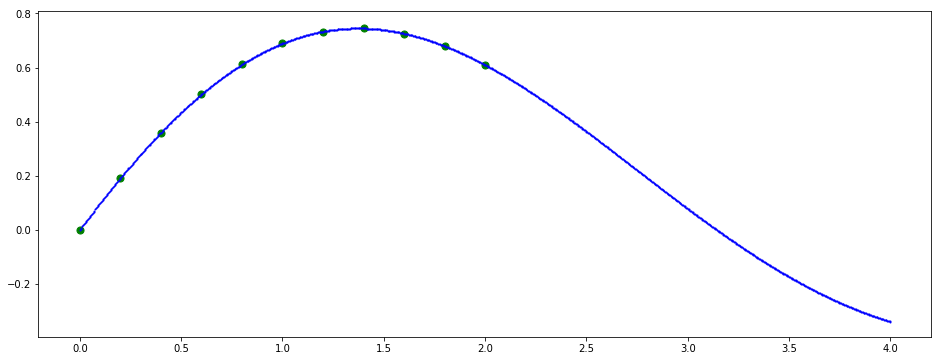

In [26]:
plt.figure(figsize=(16, 6))
plt.scatter(x.data.numpy(), y.data.numpy(), c='g', s=50) #training set
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='b', s=1) # test real
plt.scatter(x_test.data.numpy(), y_pred.data.numpy(), c='r', s=1) # test predicted
plt.show()

### Error:

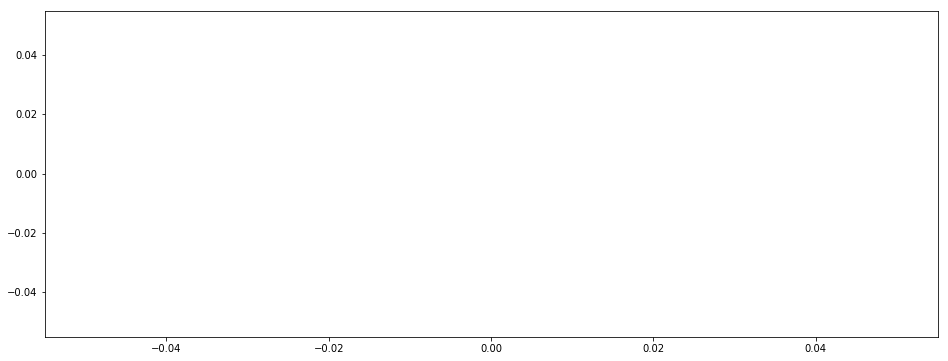

In [27]:
plt.figure(figsize=(16, 6))
plt.scatter(x_test.data.numpy(), (y_test-y_pred).data.numpy(), s=1)
plt.show()

### Naive solution (linear interpolation):

In [ ]:
def naive(xtrain, ytrain, xtest):
    ytest = []
    x_max_train = xtrain.numpy()[-1]
    for x in xtest:
        if x.data.numpy()[0] >= x_max_train:
            ytest.append(0)
            continue
        for i, xt in enumerate(xtrain):
            #print(x.data.numpy())#, xt.numpy()[0])
            if x.data.numpy()[0] < xt.numpy()[0]:
                ytest.append((ytrain[i-1] + (ytrain[i]-ytrain[i-1])*(x.data.numpy()[0]-xtrain[i-1])/(xtrain[i]-xtrain[i-1])).numpy()[0])
                break
    return ytest

In [ ]:
y_naive = naive(x_train, y_train, x_test)

In [ ]:
plt.figure(figsize=(16, 6))
plt.scatter(x.data.numpy(), y.data.numpy(), c='g', s=50) #training set
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='b', s=1) # test real
plt.scatter(x_test.data.numpy(), y_pred.data.numpy(), c='r', s=1) # test predicted
plt.scatter(x_test.data.numpy(), y_naive, c='k', s=1)

plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
plt.scatter(x_test.data.numpy(), (y_test-y_pred).data.numpy(), s=1, c='r')
plt.scatter(x_test.data.numpy(), y_test.view(1, -1).data.numpy()-y_naive, s=1, c='k')
plt.show()

In [ ]:
len(y_naive), len(x_test)